In [1]:
from PIL import Image
import cv2
import pytesseract
import numpy as np
from pytesseract import Output

In [2]:
img = np.array(Image.open('simple.jpg'))
text = pytesseract.image_to_string(img)

In [3]:
print(text)

Six examples of ways to
take notes




In [4]:
results = pytesseract.image_to_data(img, output_type = Output.DICT)
results

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 0, 0, 0, 1],
 'left': [0, 72, 72, 72, 72, 97, 172, 191, 232, 110, 110, 160, 22, 22, 22, 22],
 'top': [0, 17, 17, 17, 17, 17, 17, 20, 18, 40, 40, 42, 58, 58, 58, 58],
 'width': [320,
  175,
  175,
  175,
  20,
  70,
  14,
  36,
  15,
  104,
  43,
  54,
  274,
  274,
  274,
  274],
 'height': [240,
  39,
  39,
  15,
  12,
  15,
  12,
  12,
  11,
  16,
  16,
  14,
  154,
  154,
  154,
  154],
 'conf': [-1, -1, -1, -1, 96, 96, 97, 97, 82, -1, 96, 95, -1, -1, -1, 95],
 'text': ['',
  '',
  '',
  '',
  'Six',
  'examples',
  'of',
  'ways',
  'to',
  '',
  'take',
  'notes',
  '',
  '',
  '',
  '']}

In [5]:
for i in range(0, len(results["text"])):
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]
    text = results["text"][i]
    conf = int(results["conf"][i])  
    if conf > 58:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

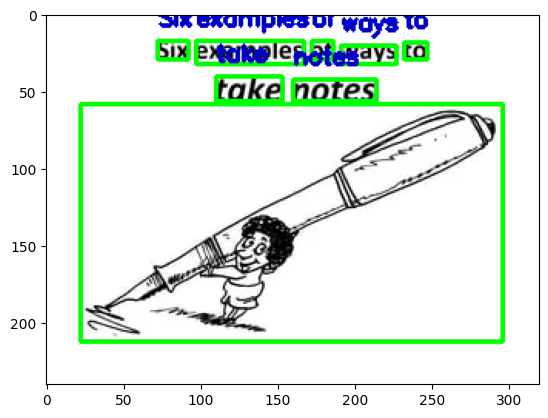

In [6]:
from matplotlib import pyplot as plt

plt.imshow(img)
 